In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble
import sklearn.gaussian_process
import sklearn.neural_network

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("qsar_aquatic_toxicity.csv", header=None, sep=';')
print(data.head())

      0     1  2      3      4      5  6  7      8
0  0.00   0.0  0  2.419  1.225  0.667  0  0  3.740
1  0.00   0.0  0  2.638  1.401  0.632  0  0  4.330
2  9.23  11.0  0  5.799  2.930  0.486  0  0  7.019
3  9.23  11.0  0  5.453  2.887  0.495  0  0  6.723
4  9.23  11.0  0  4.068  2.758  0.695  0  0  5.979


In [3]:
data.describe()

0           1           2           3           4           5  \
count  546.000000  546.000000  546.000000  546.000000  546.000000  546.000000   
mean    48.472930   58.869018    0.937729    2.313493    2.492299    1.046264   
std     46.763983   68.166554    1.618632    1.741797    0.811004    0.403677   
min      0.000000    0.000000    0.000000   -6.446000    1.000000    0.281000   
25%     15.790000   11.000000    0.000000    1.232500    1.975000    0.737000   
50%     40.460000   42.683000    0.000000    2.273500    2.344000    1.020500   
75%     70.022500   77.492750    1.000000    3.392750    2.911000    1.266500   
max    347.320000  571.952000   18.000000    9.148000    6.439000    2.500000   

                6           7           8  
count  546.000000  546.000000  546.000000  
mean     1.003663    0.353480    4.658421  
std      1.397240    0.806827    1.665215  
min      0.000000    0.000000    0.122000  
25%      0.000000    0.000000    3.601500  
50%      1.000000    0.000000    4.516000  
75%      2.000000    0.000000    5.607500  
max     11.000000   11.000000   10.047000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
0    546 non-null float64
1    546 non-null float64
2    546 non-null int64
3    546 non-null float64
4    546 non-null float64
5    546 non-null float64
6    546 non-null int64
7    546 non-null int64
8    546 non-null float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


In [5]:
correlations = data.corr()[8]
print("Correlations with target")
print(correlations)

Correlations with target
0    0.037984
1   -0.097967
2   -0.189121
3    0.535512
4    0.390621
5   -0.311821
6   -0.070179
7    0.024310
8    1.000000
Name: 8, dtype: float64


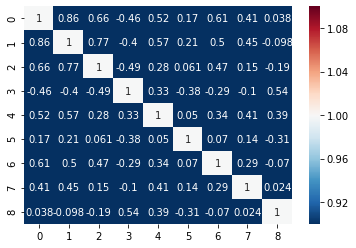

In [6]:
#Correclation
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=0, vmin=1, cmap="RdBu_r")

In [7]:
data = data.to_numpy()
X = data[:, :8]
y = data[:, 8:]
print(X.shape)
print(y.shape)

(546, 8)
(546, 1)


In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [9]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

scaler = sklearn.preprocessing.StandardScaler()
X_test = scaler.fit(X_test).transform(X_test)

In [10]:
def errors_data(y_train, y_predict):
    mean_square_error = sklearn.metrics.mean_squared_error(y_train, y_predict)
    print("Root Mean Squared", mean_square_error)
    mean_absolut = sklearn.metrics.mean_absolute_error(y_train.ravel(), y_predict.ravel())
    print("Mean Absoulte Error", mean_absolut)
    return mean_square_error, mean_absolut

In [11]:
#Support Vector Regression
param_grid = {
    'kernel':["rbf", "linear", "poly", "sigmoid"],
    'gamma':['auto', 'scale']
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.5336476487962215
Root Mean Squared 0.9954331918036726
Mean Absoulte Error 0.6944092354567349
Root Mean Squared 1.5426292832707986
Mean Absoulte Error 0.838983382633238


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.7s finished


In [12]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 10, 1),
    "min_samples_split":np.arange(2,20,1),
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=19, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='random')
0.3895982303731068
Root Mean Squared 1.0640338037497346
Mean Absoulte Error 0.7502885046752401
Root Mean Squared 2.2434392508283993
Mean Absoulte Error 1.0356776009175221


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:   11.0s finished


In [13]:
#Random Forest Regression
param_grid = {
    'max_depth':np.arange(1,20,1),
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 19 candidates, totalling 95 fits
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
0.48380992403749623
Root Mean Squared 0.6402689196194301
Mean Absoulte Error 0.623431061046996
Root Mean Squared 1.902732079299108
Mean Absoulte Error 0.9494904998896699


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    5.9s finished


In [14]:
#Ada boost regression
param_grid = {
    'learning_rate': np.arange(1,4,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.1min finished


AdaBoostRegressor(base_estimator=None, learning_rate=3.100000000000002,
                  loss='exponential', n_estimators=50, random_state=0)
0.49071551470573244
Root Mean Squared 1.0209012809097693
Mean Absoulte Error 0.8610719965275105
Root Mean Squared 1.875620549865794
Mean Absoulte Error 1.0432792028361304


In [15]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.DotProduct(), sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'n_restarts_optimizer':np.arange(0,10,1),
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 19.7min finished


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1), n_restarts_optimizer=6,
                         normalize_y=True, optimizer='fmin_l_bfgs_b',
                         random_state=0)
0.47477170583023154
Root Mean Squared 1.3625106085822831
Mean Absoulte Error 0.8974498556326679
Root Mean Squared 1.6393954948933382
Mean Absoulte Error 0.8913472852132635


In [16]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'n_jobs':np.arange(1, 10, 1)
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
0.4738502760428061
Root Mean Squared 1.3624879975990247
Mean Absoulte Error 0.8974848850549276
Root Mean Squared 1.6392777232046565
Mean Absoulte Error 0.8913504280663209


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   21.2s finished


In [17]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(1, 100,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
}
neural_network_regression = sklearn.neural_network.MLPRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed: 45.2min finished


MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(96,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
0.49889031576336423
Root Mean Squared 1.2569557814905463
Mean Absoulte Error 0.8663558499865419
Root Mean Squared 1.4805189730230779
Mean Absoulte Error 0.855401419891464
